In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   #89, 91
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from collections import defaultdict

In [2]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [3]:
dataset=dataset.drop(['id'], axis=1)

In [4]:
dataset

,Unnamed: 0,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,109542,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,109543,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,109544,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,109545,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [5]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df

# Define the list of genres
genres_to_filter = ['sertanejo', 'folk', 'j-idol', 'world-music', 'songwriter',
                    'progressive-house', 'heavy-metal', 'mpb', 'opera', 'minimal-techno',
                    'new-age', 'sleep', 'emo', 'kids', 'honky-tonk', 'synth-pop',
                    'goth', 'happy', 'salsa', 'piano']

# Filter the dataset based on the 'genre' column
filtered_df = dataset[dataset['genre'].isin(genres_to_filter)]

# Now, filtered_df contains only the rows where the 'genre' column matches the specified genres


In [6]:
#y=LabelEncoder().fit_transform(filtered_df["genre"])

# Fit the label encoder on the training labels
label_encoder = LabelEncoder()
label_encoder.fit(filtered_df["genre"])

# Transform the test labels and predictions
y= label_encoder.transform(filtered_df["genre"])

# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)

X=filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72, stratify=y)

norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

C:\Users\corra\AppData\Local\Temp\ipykernel_31340\696513919.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)
C:\Users\corra\AppData\Local\Temp\ipykernel_31340\696513919.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [25]:

# Define the range of values to search over for each parameter
param_grid = {
    'C': [1, 10, 100],
    'dual':[True, False],
    'max_iter': [2000, 3000],    #1000 già provato
    'tol': [0.001, 0.1, 0.01],
    'multi_class': ['ovr'],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = LinearSVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best cross-validated score:", best_score)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best parameters: {'C': 10, 'dual': True, 'max_iter': 2000, 'tol': 0.01}
Best mean cross-validated score: 0.5368204497502319


c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:

# Define the range of values to search over for each parameter
param_grid = {
    'C': [1, 10, 100],
    'dual':[True, False],
    'max_iter': [2000, 3000],    #1000 già provato
    'tol': [0.001, 0.1, 0.01],
    'multi_class': ['ovr'],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = LinearSVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best cross-validated score:", best_score)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best parameters: {'C': 10, 'dual': True, 'max_iter': 2000, 'multi_class': 'ovr', 'tol': 0.001}
Best cross-validated score: 0.5394558020223881


c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
svm = LinearSVC(**best_params)

svm.fit(X_train_norm, y_train)

print(svm.score(X_train_norm, y_train))

0.5451691882729612


c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# If you used a label encoder to encode the class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Get the class names
class_names = label_encoder.classes_

# Print the classification report with class names
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

                   precision    recall  f1-score   support

              emo       0.57      0.45      0.50       200
             folk       0.54      0.07      0.13       197
             goth       0.22      0.03      0.05       200
            happy       0.59      0.68      0.63       200
      heavy-metal       0.44      0.66      0.53       200
       honky-tonk       0.62      0.80      0.70       196
           j-idol       0.54      0.57      0.56       200
             kids       0.70      0.81      0.75       198
   minimal-techno       0.73      0.88      0.80       199
              mpb       0.29      0.14      0.18       200
          new-age       0.55      0.66      0.60       199
            opera       0.49      0.60      0.54       198
            piano       0.57      0.32      0.41       200
progressive-house       0.49      0.61      0.55       200
            salsa       0.53      0.79      0.64       199
        sertanejo       0.51      0.79      0.62       

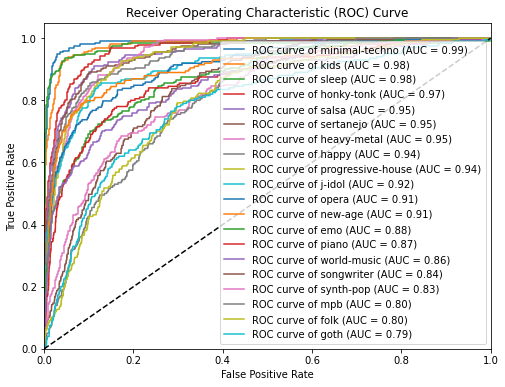

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# Get the decision function scores for each class
y_scores = svm.decision_function(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

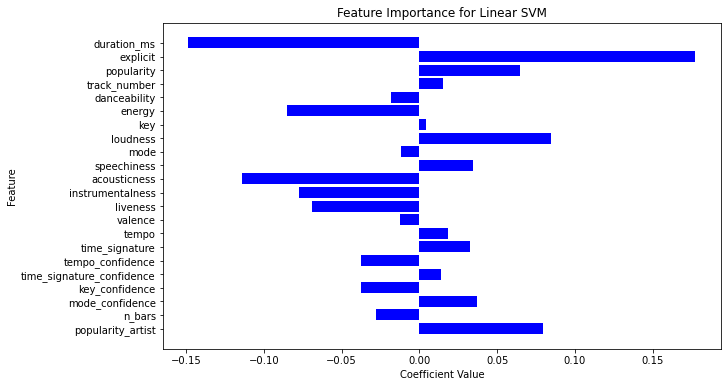

In [15]:
# Assuming you have trained a linear SVM classifier named 'svm'

# Extract feature coefficients
coefficients = svm.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()


# SVM Non linear

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [14]:
# Define the range of values to search over for each parameter
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale'],
    'degree': [2, 3],
    'probability': [True]
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale'], 'kernel': ['poly', 'rbf'],
                         'probability': [True]})

In [15]:
# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best cross-validated score:", best_score)

Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Best cross-validated score: 0.6412829283531463


In [17]:
svm = SVC(**best_params)
svm.fit(X_train_norm, y_train)
train = svm.score(X_train_norm, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# If you used a label encoder to encode the class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Get the class names
class_names = label_encoder.classes_

# Print the classification report with class names
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("TR Accuracy;", train)


                   precision    recall  f1-score   support

              emo       0.61      0.58      0.60       200
             folk       0.38      0.33      0.35       197
             goth       0.40      0.40      0.40       200
            happy       0.79      0.79      0.79       200
      heavy-metal       0.57      0.64      0.60       200
       honky-tonk       0.81      0.84      0.83       196
           j-idol       0.75      0.70      0.73       200
             kids       0.79      0.79      0.79       198
   minimal-techno       0.84      0.85      0.84       199
              mpb       0.45      0.46      0.45       200
          new-age       0.64      0.66      0.65       199
            opera       0.65      0.63      0.64       198
            piano       0.74      0.57      0.65       200
progressive-house       0.64      0.74      0.68       200
            salsa       0.70      0.77      0.74       199
        sertanejo       0.72      0.77      0.74       

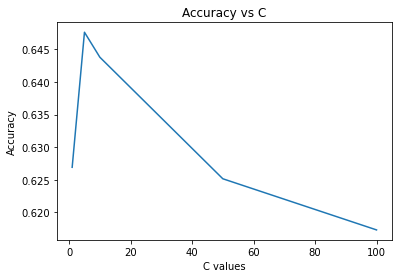

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid
param_grid = {'C': [1,5,10,50,100], 'degree': [2], 'gamma': ['scale'], 'kernel': ['rbf']}

# Create a list to store accuracy scores
accuracy_scores = []

# Perform grid search with cross-validation
lr = SVC()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_norm, y_train)

# Extract the results and store accuracy scores
results = grid_search.cv_results_
for mean_score in results['mean_test_score']:
    accuracy_scores.append(mean_score)

# Plot the accuracy scores
plt.plot(param_grid['C'], accuracy_scores)
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.show()


In [11]:
accuracy_scores

[0.6269066885047515,
 0.6476240735320639,
 0.6437949388070454,
 0.6251488606452287,
 0.6173016957036327]

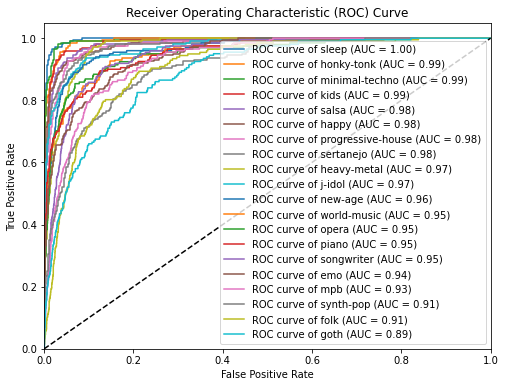

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
y_score = svm.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

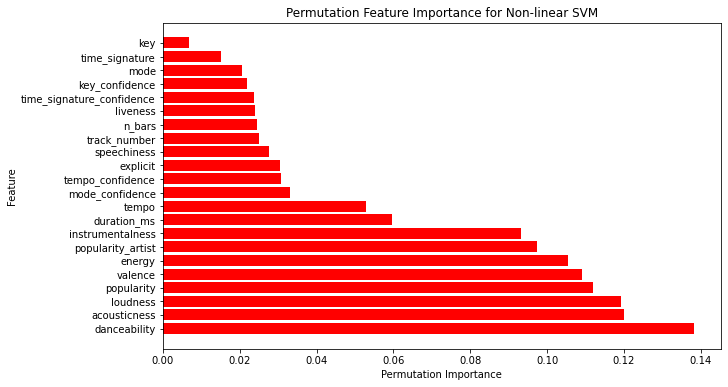

In [19]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(svm, X_test_norm, y_test, n_repeats=5, random_state=42)

# Get feature names
feature_names = X_test.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='red')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Non-linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest importance at the top
plt.show()


# Non linear regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('nuovo_dataset_totale.csv')

# Filter the dataset based on the 'genre' column
filtered_df = dataset
filtered_df = filtered_df.drop(['id'], axis=1)

# Function to transform strings into lists of floats
def transform_to_list(lst_str):
    lst_str = lst_str.strip('][').split(', ')
    return [float(x) for x in lst_str]

# Apply the function to the 'popularity_artist' column
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(transform_to_list)

# Calculate the mean of each list
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean), 2)

# Define the target variables
y = filtered_df[['popularity']]

# Drop unnecessary columns from the feature matrix
X = filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number', 'album_type', 'album_release_date',
                      'album_release_date_precision', 'album_name', 'genre',
                      'popularity'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72, stratify=y)

# Normalize the feature matrix
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Random forest regress

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300],      # Number of trees in the forest
    'max_depth': [10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train_norm, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_model.predict(X_test_norm)

# Optionally, print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


: 

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 158.25078665167314
Root Mean Squared Error (RMSE): 12.579776891967247
R-squared (R2): 0.6988663812379583


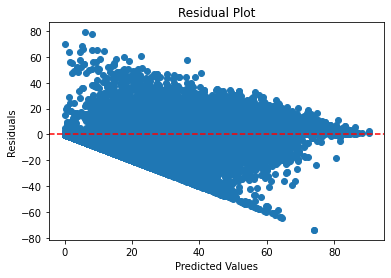

In [20]:
# Calculate residuals
residuals = np.array(y_test).squeeze() - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


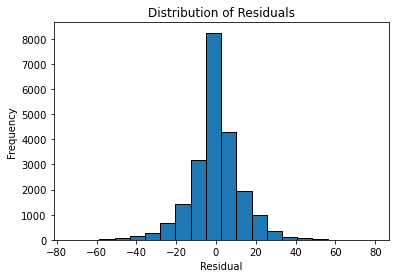

In [21]:
# Histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()